<a href="https://colab.research.google.com/github/nishthadighe-bit/wine-quality-classification-ml/blob/main/Wine_Quality_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍷Wine Quality Classification
This project compares KNN, Decision Tree , and SVM Classifiers on the Wine Quality Dataset . We evaluate Model Performance using Accuracy,Precision,Recall,and Confusion Metrics.

## 📂 Dataset Description
- Source : UCI Machine Learning Respository
- Type  :  Red Wine Physicochemical Properties
- Target : Wine Quality Score ( converted to low, medium, high)


In [ ]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the Wine Quality Dataset (Red Wine)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data =pd.read_csv(url,sep=';')
# Display first few rows
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


from matplotlib import pyplot as plt
_df_0['fixed acidity'].plot(kind='hist', bins=20, title='fixed acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['volatile acidity'].plot(kind='hist', bins=20, title='volatile acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['citric acid'].plot(kind='hist', bins=20, title='citric acid')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['residual sugar'].plot(kind='hist', bins=20, title='residual sugar')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='fixed acidity', y='volatile acidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='volatile acidity', y='citric acid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='citric acid', y='residual sugar', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='residual sugar', y='chlorides', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['fixed acidity'].plot(kind='line', figsize=(8, 4), title='fixed acidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['volatile acidity'].plot(kind='line', figsize=(8, 4), title='volatile acidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['citric acid'].plot(kind='line', figsize=(8, 4), title='citric acid')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['residual sugar'].plot(kind='line', figsize=(8, 4), title='residual sugar')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
# Override the warning system to suppress UndefinedMetricWarning
def warn(*args, **kwargs):
    pass
warnings.warn = warn

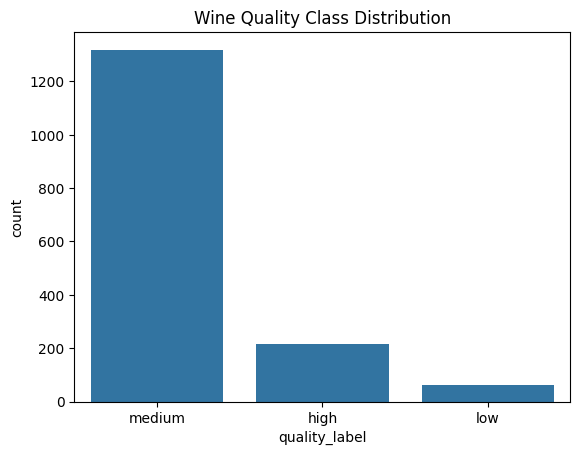

In [ ]:
# Convert numerical quality scores to categorical labels
def label_quality(q):
  if q <= 4:
    return 'low'
  elif q <= 6:
      return 'medium'
  else:
        return 'high'
data['quality_label'] = data['quality'].apply(label_quality)
# Visualize class distribution
sns.countplot(x='quality_label', data=data)
plt.title("Wine Quality Class Distribution")
plt.show()


## 📈  K-Nearest Neighbors (KNN) Classifier
We begin by training a KNN model to classify wine quality. KNN is a non-parametric, instance-based learning algorithm that predicts the class of a sample based on the majority class of its nearest neighbors.

- **Hyperparameter:** Number of neighbors (`n_neighbors`)
- **Time Complexity:** \( 0(n \cdot d) \) per prediction
- **Goal:** Evaluate accuracy, precision, and recall on test data



In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# Define features and target
X = data.drop(['quality', 'quality_label'], axis=1)
y = data['quality_label']
# Normalize features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Intitialize and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Predict on test set
y_pred_knn = knn.predict(X_test)
# Evalute model
print("KNN Classification Report:\n")
print(classification_report(y_test, y_pred_knn))
# Confusion Matrix
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


KNN Classification Report:

              precision    recall  f1-score   support

        high       0.65      0.43      0.51        47
         low       0.50      0.09      0.15        11
      medium       0.87      0.95      0.91       262

    accuracy                           0.85       320
   macro avg       0.67      0.49      0.53       320
weighted avg       0.83      0.85      0.83       320

KNN Confusion Matrix:
[[ 20   0  27]
 [  0   1  10]
 [ 11   1 250]]


## 🌳 Decision Tree Classifier
We train a Decision Tree Model to classify wine quality. Decision Trees split data based on feature thresholds, creating interpretable paths from root to leaf.

- **Hyperparameter:** Maximum depth ('max_depth')
- **Visualization:** Tree structure showing decision rules
- **Goal:** Interpret feature importance and evalute performance

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
# Initialize and train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
# Predict on test set
y_pred_dt = dt.predict(X_test)
# Evaluate model
print("Decision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classification Report:

              precision    recall  f1-score   support

        high       0.51      0.60      0.55        47
         low       0.12      0.18      0.15        11
      medium       0.89      0.85      0.87       262

    accuracy                           0.79       320
   macro avg       0.51      0.54      0.52       320
weighted avg       0.81      0.79      0.80       320

Decision Tree Confusion Matrix:
[[ 28   1  18]
 [  0   2   9]
 [ 27  13 222]]


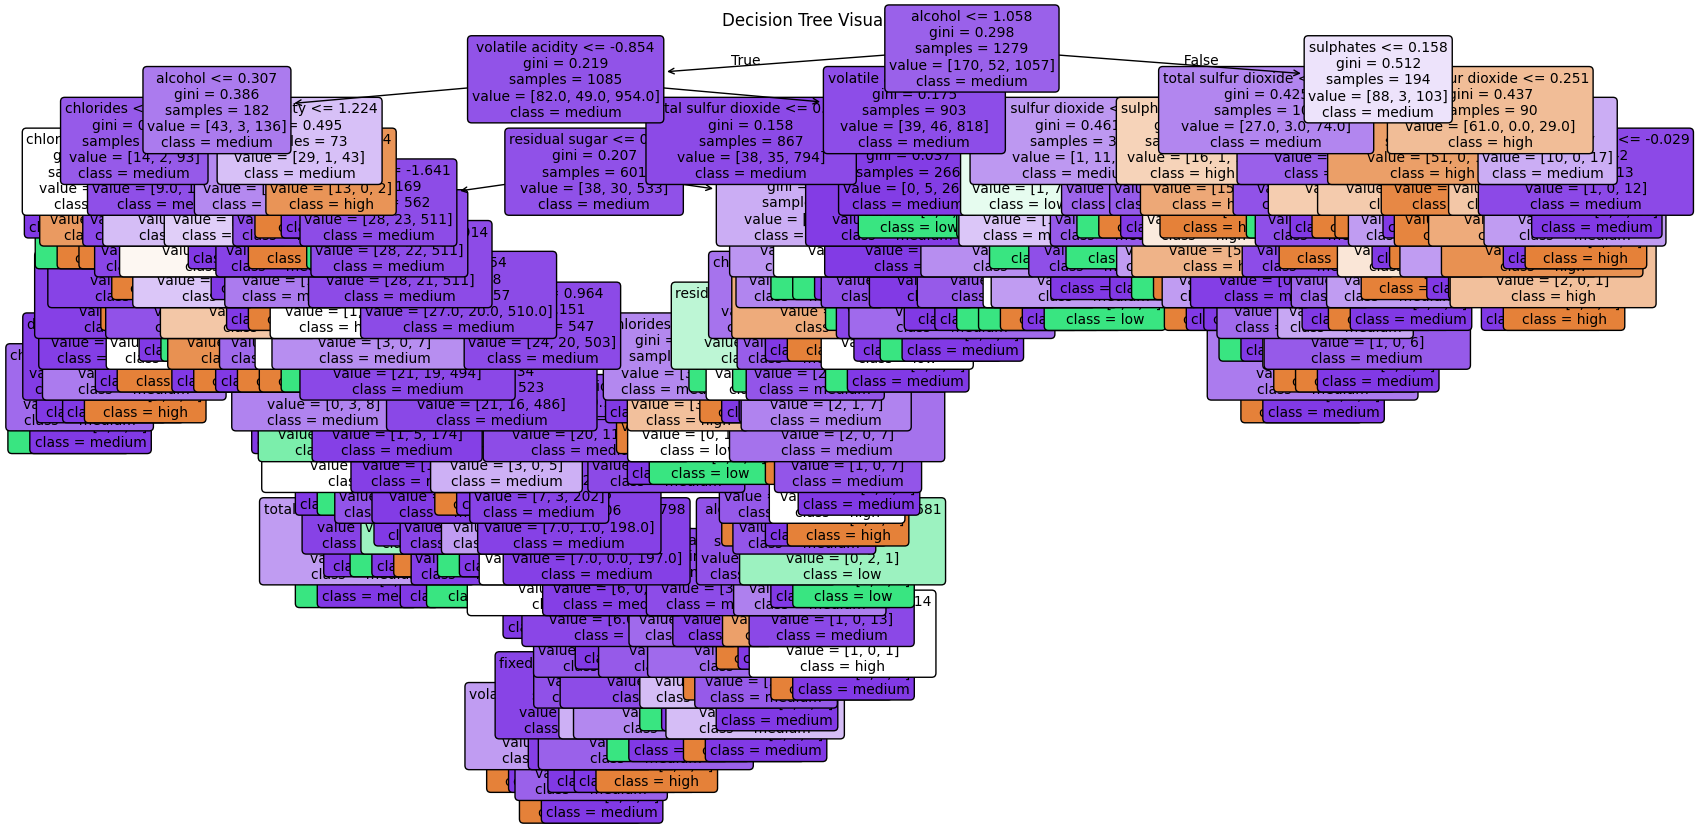

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt,
          feature_names=X.columns,
          class_names=dt.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

## 🌀 Support Vector Machine (SVM) Classifier
We train an SVM model using the RBF kernel. SVMs find optimal hyperplanes that separate classes with maximum margin.
- **Kernel:** Radial Basis Function (RBF)
- **Time Complexity:** \( 0(n^2 \cdot d) \)for training
- **Goal:** Compare performance with KNN and Decision Tree


In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train SVM model with RBF kernel
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm.predict(X_test)

# Evaluate model
print("SVM Classification Report:\n")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))



SVM Classification Report:

              precision    recall  f1-score   support

        high       0.71      0.26      0.38        47
         low       0.00      0.00      0.00        11
      medium       0.85      0.98      0.91       262

    accuracy                           0.84       320
   macro avg       0.52      0.41      0.43       320
weighted avg       0.80      0.84      0.80       320

SVM Confusion Matrix:
[[ 12   0  35]
 [  0   0  11]
 [  5   0 257]]


## 📊 Model Comparison
We compare all three models using accuracy,precision and recall. This helps to identify which algorithm performs best on the Wine Quality Classification Task.

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
# Function to collect metrics
def get_metrics(y_true, y_pred, model_name):
  return {
      "Model": model_name,
      "Accuracy": accuracy_score(y_true, y_pred),
      "Precision": precision_score(y_true, y_pred, average='weighted'),
      "Recall": recall_score(y_true, y_pred , average='weighted')
  }
# Gather results
results = [
    get_metrics(y_test, y_pred_knn, "KNN"),
    get_metrics(y_test, y_pred_dt, "Decision Tree"),
    get_metrics(y_test, y_pred_svm, "SVM")
]
# Display as DataFrame
import pandas as pd
comparison_df =pd.DataFrame(results)
print("Model Comparison Table")
comparison_df

Model Comparison Table


,Model,Accuracy,Precision,Recall
0,KNN,0.846875,0.825142,0.846875
1,Decision Tree,0.787500,0.809039,0.787500
2,SVM,0.840625,0.798128,0.840625


from matplotlib import pyplot as plt
_df_12['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_16.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='index', y='Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Precision']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Precision')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Recall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Recall')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_24['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='index', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='Precision', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_31['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_31, x='Recall', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## 🔍 Confusion Metrics
Confusion matrices reveal how well each model distinguishes between wine quality classes and highlight false positives/negatives.


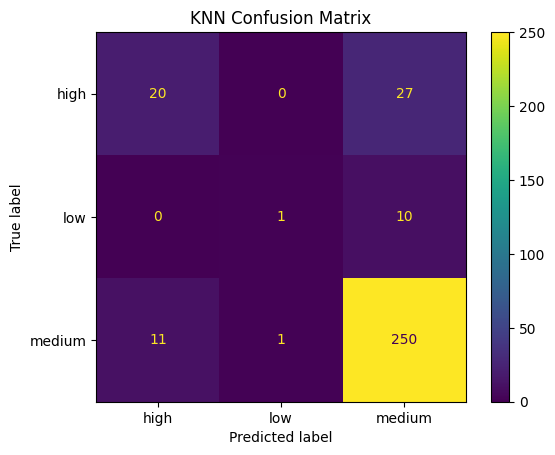

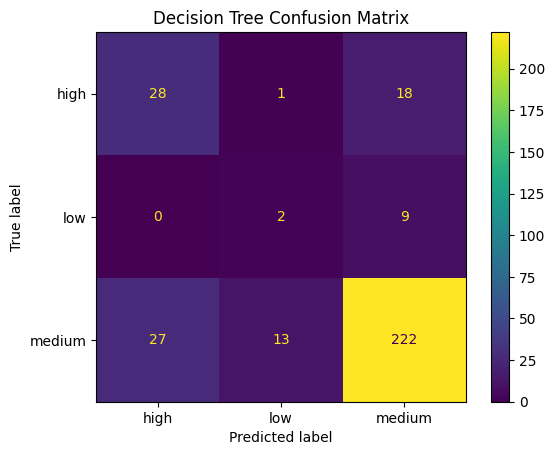

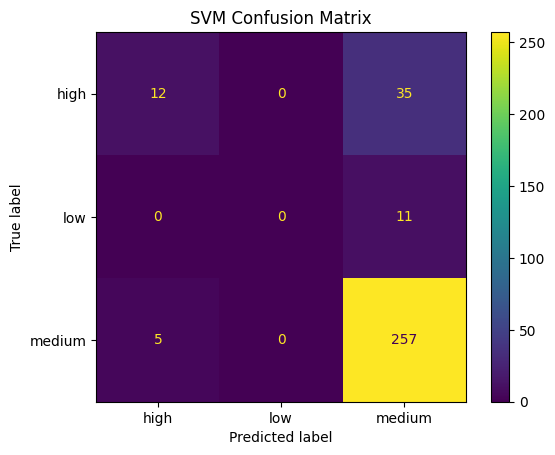

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Display confusion matrices for all models
for model_name, y_pred in zip(["KNN", "Decision Tree", "SVM"], [y_pred_knn, y_pred_dt, y_pred_svm]):
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
  plt.title(f"{model_name} Confusion Matrix")
  plt.show()

## 🧪 Testing on new examples
We test each model on new synthetic examples to observe prediction behavior and robustness.


In [ ]:
import numpy as np
# Examole: synthetic test case (based on real feature ranges)
new_sample = np.array([[7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]])
new_sample_scaled = scaler.transform(new_sample)
# Predict with all models
print("Predictions on New Sample:")
print("KNN:", knn.predict(new_sample_scaled)[0])
print("Decision Tree:", dt.predict(new_sample_scaled)[0])
print("SVM:", svm.predict(new_sample_scaled)[0])

Predictions on New Sample:
KNN: medium
Decision Tree: medium
SVM: medium


## ✅ Final Conclusion & Summary
This project successfully explored wine quality classification using three distinct machine learning algorithms: K-Nearest Neighbors (KNN), Decision Tree, and Support Vector Machine (SVM). Each model was trained on physicochemical properties of red wine and evaluated using accuracy, precision, recall, and confusion matrices.

### 🔍 Key Takeaways:
- **KNN** offered simplicity and decent performance, relying on proximity-based decision-making.
- **Decision Tree** provided interpretability through visualized decision paths, making it ideal for understanding feature importance.
- **SVM** delivered strong predictive accuracy, especially for complex boundaries, though it lacked transparency compared to the tree-based model.

### 📊 Evaluation Summary:
All models were tested on stratified data to ensure balanced class representation. Metrics were calculated fairly, and confusion matrices revealed how each model handled class distinctions. A synthetic test case further demonstrated model behavior on unseen data.

### 💡 Reflections:
This task deepened understanding of classification workflows, model comparison, and the impact of class imbalance. It also highlighted the importance of thoughtful preprocessing, metric interpretation, and visual documentation in data science projects.

### 🚀 Next Steps:
- Experiment with hyperparameter tuning (e.g., grid search)
- Explore ensemble methods like Random Forest or Voting Classifier
- Extend the project to include white wine data or regression-based quality scoring

This notebook blends technical rigor with clarity and creativity—ready for academic submission or portfolio showcase.
